In [1]:
import os
import numpy as np
import pandas as pd
from sktime.datasets import load_UCR_UEA_dataset
from sktime.datasets import tsc_dataset_names
import matplotlib.pyplot as plt

In [2]:
'DuckDuckGeese' in tsc_dataset_names.multivariate

['ArticularyWordRecognition',
 'AsphaltObstaclesCoordinates',
 'AsphaltPavementTypeCoordinates',
 'AsphaltRegularityCoordinates',
 'AtrialFibrillation',
 'BasicMotions',
 'CharacterTrajectories',
 'Cricket',
 'DuckDuckGeese',
 'EigenWorms',
 'Epilepsy',
 'EthanolConcentration',
 'ERing',
 'FaceDetection',
 'FingerMovements',
 'HandMovementDirection',
 'Handwriting',
 'Heartbeat',
 'InsectWingbeat',
 'JapaneseVowels',
 'Libras',
 'LSST',
 'MotorImagery',
 'NATOPS',
 'PenDigits',
 'PEMS-SF',
 'PhonemeSpectra',
 'RacketSports',
 'SelfRegulationSCP1',
 'SelfRegulationSCP2',
 'SpokenArabicDigits',
 'StandWalkJump',
 'UWaveGestureLibrary']

In [14]:
dataset_handle = 'JapaneseVowels'
dataset_name = 'japanese_vowels'
processed_dir = './../../processed/'
output_dir = f'./../../processed/{dataset_name}/'
os.makedirs(output_dir, exist_ok=True)
full_outp_fname = os.path.join(output_dir, f'{dataset_name}.csv')
test_key_outp_fname = os.path.join(output_dir, f'{dataset_name}_test_key.csv')
train_outp_fname = os.path.join(output_dir, f'{dataset_name}_train.csv')
test_outp_fname = os.path.join(output_dir, f'{dataset_name}_test.csv')



## Load training data

In [15]:
X_train, y_train = load_UCR_UEA_dataset(name=dataset_handle, split='TRAIN')
X_test, y_test = load_UCR_UEA_dataset(name=dataset_handle, split='TEST')

In [16]:
def prepare_dataset(X, y):
    df = {}
    label_column = []
    for i, row in X.iterrows():
        label = y[i]
        for column in X.columns:
            series_values = row[column].tolist()
            if column in df:
                df[column].extend(series_values)
            else:
                df[column] = series_values
        label_column += [label] * len(series_values)

    df['label'] = label_column
    df = pd.DataFrame(df)
    df.insert(0, 'series_id', 0)
    timestep = list(range(len(df)))
    df.insert(1, 'timestep', timestep)

    return df

            


In [17]:
train_df = prepare_dataset(X_train, y_train)
test_df = prepare_dataset(X_test, y_test)

full = pd.concat([train_df, test_df])


test_key_df = test_df[['series_id', 'timestep', 'label']]
test_df.drop(columns=['label'], inplace=True)

In [18]:
train_df

,series_id,timestep,dim_0,dim_1,dim_2,dim_3,dim_4,dim_5,dim_6,dim_7,dim_8,dim_9,dim_10,dim_11,label
0,0,0,1.860936,-0.207383,0.261557,-0.214562,-0.171253,-0.118167,-0.277557,0.025668,0.126701,-0.306756,-0.213076,0.088728,1
1,0,1,1.891651,-0.193249,0.235363,-0.249118,-0.112890,-0.112238,-0.311997,-0.027122,0.171457,-0.289431,-0.247722,0.093011,1
2,0,2,1.939205,-0.239664,0.258561,-0.291458,-0.041053,-0.102034,-0.383300,0.019013,0.169510,-0.314894,-0.227908,0.074638,1
3,0,3,1.717517,-0.218572,0.217119,-0.228186,-0.018608,-0.137624,-0.403318,-0.009643,0.164607,-0.323267,-0.210105,0.098098,1
4,0,4,1.741191,-0.279891,0.196583,-0.236377,-0.032012,-0.090612,-0.363134,-0.012571,0.124298,-0.351171,-0.216545,0.113899,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4269,0,4269,1.141889,-0.485815,0.288329,-0.687604,0.301889,-0.203278,0.057573,0.382032,-0.245315,-0.187900,-0.034779,0.170756,9
4270,0,4270,1.162979,-0.340980,0.290894,-0.553881,0.324858,-0.250906,0.008865,0.249452,-0.350530,-0.169895,0.101546,0.227674,9
4271,0,4271,1.224771,-0.371558,0.335834,-0.547974,0.384870,-0.203234,-0.058058,0.263690,-0.368357,-0.213397,0.117961,0.226729,9
4272,0,4272,1.030606,-0.309280,0.311761,-0.466693,0.453942,-0.260364,0.004476,0.227590,-0.413259,-0.169547,0.168689,0.214409,9


In [8]:
full.to_csv(full_outp_fname, index=False)
test_key_df.to_csv(test_key_outp_fname, index=False)
train_df.to_csv(train_outp_fname, index=False)
test_df.to_csv(test_outp_fname, index=False)

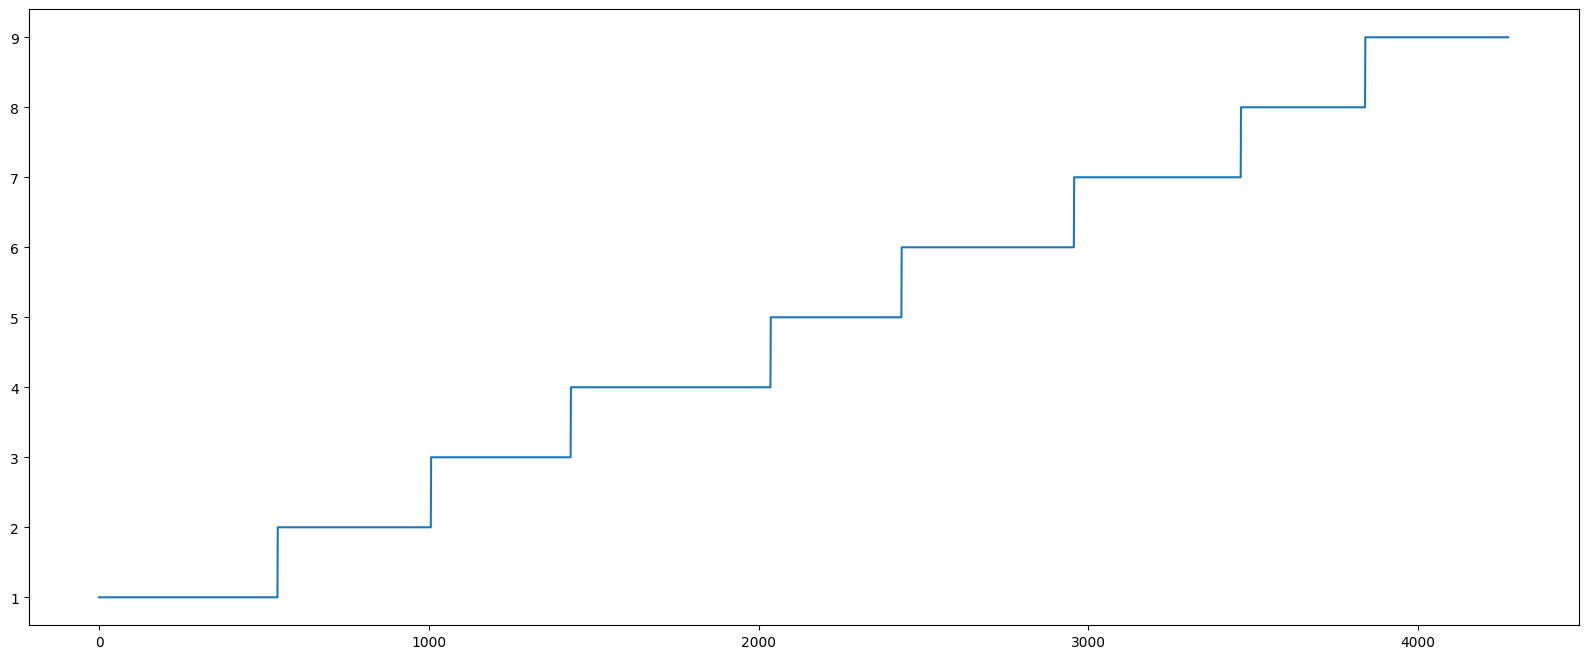

In [19]:
plt.figure(figsize=(20,8))
plt.plot(train_df['label'])